In [132]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime as dt
from datetime import timedelta
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Importing Classifier Modules
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

In [133]:
loan = pd.read_csv("Data for Cleaning & Modeling.csv")
df = loan
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


## Data Preprocessing

In [134]:
#Renaming columns based on data dictionary
df = df.rename({'X1': 'InterestRate', 'X2': 'LoanId', 'X3': 'BorrowerId', 'X4': 'RequestedAmount', 'X5': 'FundedAmount',
                'X6': 'InvestorFundedPortion', 'X7': 'n_Payments', 'X8': 'LoanGrade', 'X9': 'LoanSubgrade', 'X10': 'Employer_JobTitle',
                'X11': 'n_YearsEmployed', 'X12': 'HomeOwnership', 'X13': 'AnnualIncome', 'X14': 'IncomeCheck', 'X15': 'IssueDate',
                'X16': 'Reason', 'X17': 'LoanCategory', 'X18': 'LoanTitle', 'X19': 'Zipcode_3', 'X20': 'State', 'X21': 'Ratio', 'X22': 'n_Incidences',
                'X23': 'DateCreditLine', 'X24': 'n_Inquiries', 'X25': 'MonthsLastDeliquency', 'X26': 'MonthsPublicRecord', 'X27': 'n_OpenCreditLines',
                'X28': 'n_DerogatoryRecords', 'X29': 'CreditRevolvingBalance', 'X30': 'UtilizationRate', 'X31': 'n_CreditLines', 'X32': 'ListingStatus'}, axis = 1)

df.head()

,InterestRate,LoanId,BorrowerId,RequestedAmount,FundedAmount,InvestorFundedPortion,n_Payments,LoanGrade,LoanSubgrade,Employer_JobTitle,...,DateCreditLine,n_Inquiries,MonthsLastDeliquency,MonthsPublicRecord,n_OpenCreditLines,n_DerogatoryRecords,CreditRevolvingBalance,UtilizationRate,n_CreditLines,ListingStatus
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   InterestRate            338990 non-null  object 
 1   LoanId                  399999 non-null  float64
 2   BorrowerId              399999 non-null  float64
 3   RequestedAmount         399999 non-null  object 
 4   FundedAmount            399999 non-null  object 
 5   InvestorFundedPortion   399999 non-null  object 
 6   n_Payments              399999 non-null  object 
 7   LoanGrade               338730 non-null  object 
 8   LoanSubgrade            338730 non-null  object 
 9   Employer_JobTitle       376014 non-null  object 
 10  n_YearsEmployed         382462 non-null  object 
 11  HomeOwnership           338639 non-null  object 
 12  AnnualIncome            338972 non-null  float64
 13  IncomeCheck             399999 non-null  object 
 14  IssueDate           

<b>Dropping null rows

In [136]:
df[df["State"].isna()]
df = df.drop(index=364111)
df = df.dropna(subset=["InterestRate"])

<b>Cleaning up data by removing symbols, or converting to a better format as required, etc.

In [137]:
#Clean data of unnecessary symbols like '$', ','

#Remove % in Interest Rate and convert it to float
df['InterestRate'] = df['InterestRate'].str.replace('[^0-9.\s]+', '').astype(float)/100

#Remove $ and commas in Amounts and convert to float
df['RequestedAmount'] = df['RequestedAmount'].str.replace('[^0-9.\s]+', '').astype(float)
df['FundedAmount'] = df['FundedAmount'].str.replace('[^0-9.\s]+', '').astype(float)
df['InvestorFundedPortion'] = df['InvestorFundedPortion'].str.replace('[^0-9.\s]+', '').astype(float)

#Convert to numbers
df['n_Payments'] = df['n_Payments'].str.replace('[^0-9.\s]+', '').astype(float)
df['n_YearsEmployed'] = df['n_YearsEmployed'].apply(lambda x: '0' if x == '< 1 year' else x)
df['n_YearsEmployed'] = df['n_YearsEmployed'].str.replace('[^0-9.\s]+', '').astype(float)

# df[['IssueMonth','IssueYear']] = df['IssueDate'].str.split('-', expand=True)

# df['IssueDay'] = df['IssueDay'].astype(float).astype(int)
# df['IssueMonth'] = pd.to_datetime(df['IssueMonth'], format='%Y').dt.year
df['IssueDate'] = pd.to_datetime(df['IssueDate'],format=r"%b-%y")
df['IssueDate_Month'] = df['IssueDate'].dt.month
df['IssueDate_Year'] = df['IssueDate'].dt.year


df['DateCreditLine'] = pd.to_datetime(df['DateCreditLine'],format=r"%b-%y")
df['DateCreditLine'] = pd.to_datetime(df['DateCreditLine'])
df['DateCreditLine'] = dt.date.today().year - df['DateCreditLine'].dt.year

#Remove % from Utilization Rate
df['UtilizationRate'] = df['UtilizationRate'].str.replace('[^0-9.\s]+', '').astype(float)/100

df = df.reset_index(drop=True)
df.head()

,InterestRate,LoanId,BorrowerId,RequestedAmount,FundedAmount,InvestorFundedPortion,n_Payments,LoanGrade,LoanSubgrade,Employer_JobTitle,...,MonthsLastDeliquency,MonthsPublicRecord,n_OpenCreditLines,n_DerogatoryRecords,CreditRevolvingBalance,UtilizationRate,n_CreditLines,ListingStatus,IssueDate_Month,IssueDate_Year
0,0.1189,54734.0,80364.0,25000.0,25000.0,19080.0,36.0,B,B4,NaN,...,NaN,NaN,10.0,0.0,28854.0,0.521,42.0,f,8,2009
1,0.1071,55742.0,114426.0,7000.0,7000.0,673.0,36.0,B,B5,CNN,...,NaN,NaN,7.0,0.0,33623.0,0.767,7.0,f,5,2008
2,0.1699,57167.0,137225.0,25000.0,25000.0,24725.0,36.0,D,D3,Web Programmer,...,41.0,NaN,10.0,0.0,19878.0,0.663,17.0,f,8,2014
3,0.1311,57245.0,138150.0,1200.0,1200.0,1200.0,36.0,C,C2,city of beaumont texas,...,64.0,NaN,5.0,0.0,2584.0,0.404,31.0,f,3,2010
4,0.1357,57416.0,139635.0,10800.0,10800.0,10692.0,36.0,C,C3,State Farm Insurance,...,58.0,NaN,14.0,0.0,3511.0,0.256,40.0,f,11,2009


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338989 entries, 0 to 338988
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InterestRate            338989 non-null  float64       
 1   LoanId                  338989 non-null  float64       
 2   BorrowerId              338989 non-null  float64       
 3   RequestedAmount         338989 non-null  float64       
 4   FundedAmount            338989 non-null  float64       
 5   InvestorFundedPortion   338989 non-null  float64       
 6   n_Payments              338989 non-null  float64       
 7   LoanGrade               287123 non-null  object        
 8   LoanSubgrade            287123 non-null  object        
 9   Employer_JobTitle       318733 non-null  object        
 10  n_YearsEmployed         324195 non-null  float64       
 11  HomeOwnership           287030 non-null  object        
 12  AnnualIncome            287238

<b>Drop unnecessary columns

In [139]:
def missing_perc(df):
    missing_df = pd.DataFrame()
    missing_df['Col Name'] = list(df.columns)
    missing_df['Missing %'] = [round(i/df.shape[0] * 100,2) for i in df.isnull().sum()]
    missing_df.sort_values(by=['Missing %'], ascending=False,inplace=True)
    missing_df['Missing %'] = missing_df['Missing %'].astype('str') + '%'
    pd.set_option('display.max_rows', None)
    return missing_df
missing_df = missing_perc(df)
missing_df[missing_df['Missing %'] != '0.0%']

,Col Name,Missing %
25,MonthsPublicRecord,87.2%
15,Reason,69.01%
24,MonthsLastDeliquency,54.71%
11,HomeOwnership,15.33%
7,LoanGrade,15.3%
8,LoanSubgrade,15.3%
12,AnnualIncome,15.27%
9,Employer_JobTitle,5.98%
10,n_YearsEmployed,4.36%
29,UtilizationRate,0.07%


1. Dropping LoanId and BorrowerId as they are unique identifiers and have no effect on the data
2. Dropping Reason as it's not unique enough to categorize and too many null values (~69%) to impute
3. Dropping LoanTitle as it is provided by Borrowers and doesn't have a specific format, there are usernames, emails, titles which make it confusing
4. Dropped 'MonthsLastDeliquency', 'MonthsPublicRecord' as they have too many null values to impute - ~55% and ~87% are null values respectively.
5. Dropping IssueDate as calculated the issue month and year from it

In [140]:
df = df.drop(['LoanId', 'BorrowerId', 'Reason', 'LoanTitle', 'IssueDate', 
                'MonthsLastDeliquency', 'MonthsPublicRecord'], axis = 1)
df.columns

Index(['InterestRate', 'RequestedAmount', 'FundedAmount',
       'InvestorFundedPortion', 'n_Payments', 'LoanGrade', 'LoanSubgrade',
       'Employer_JobTitle', 'n_YearsEmployed', 'HomeOwnership', 'AnnualIncome',
       'IncomeCheck', 'LoanCategory', 'Zipcode_3', 'State', 'Ratio',
       'n_Incidences', 'DateCreditLine', 'n_Inquiries', 'n_OpenCreditLines',
       'n_DerogatoryRecords', 'CreditRevolvingBalance', 'UtilizationRate',
       'n_CreditLines', 'ListingStatus', 'IssueDate_Month', 'IssueDate_Year'],
      dtype='object')

Changing number of Payments (36 or 60 months) to a binary categorical variable that shows if it had 36 months as the number of payments or not

In [141]:
df['is_36'] = df['n_Payments'].apply(lambda x: 1 if x == 36 else 0)
df['is_60'] = df['n_Payments'].apply(lambda x: 1 if x == 60 else 0)
df = df.drop(['n_Payments'], axis=1)

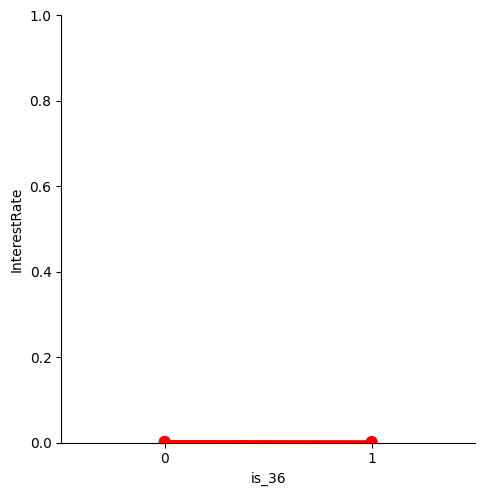

In [142]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100
h = sns.PairGrid(data=i, x_vars=['is_36'], y_vars='InterestRate', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

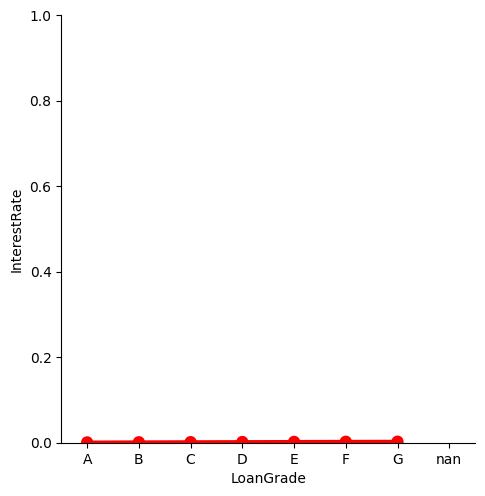

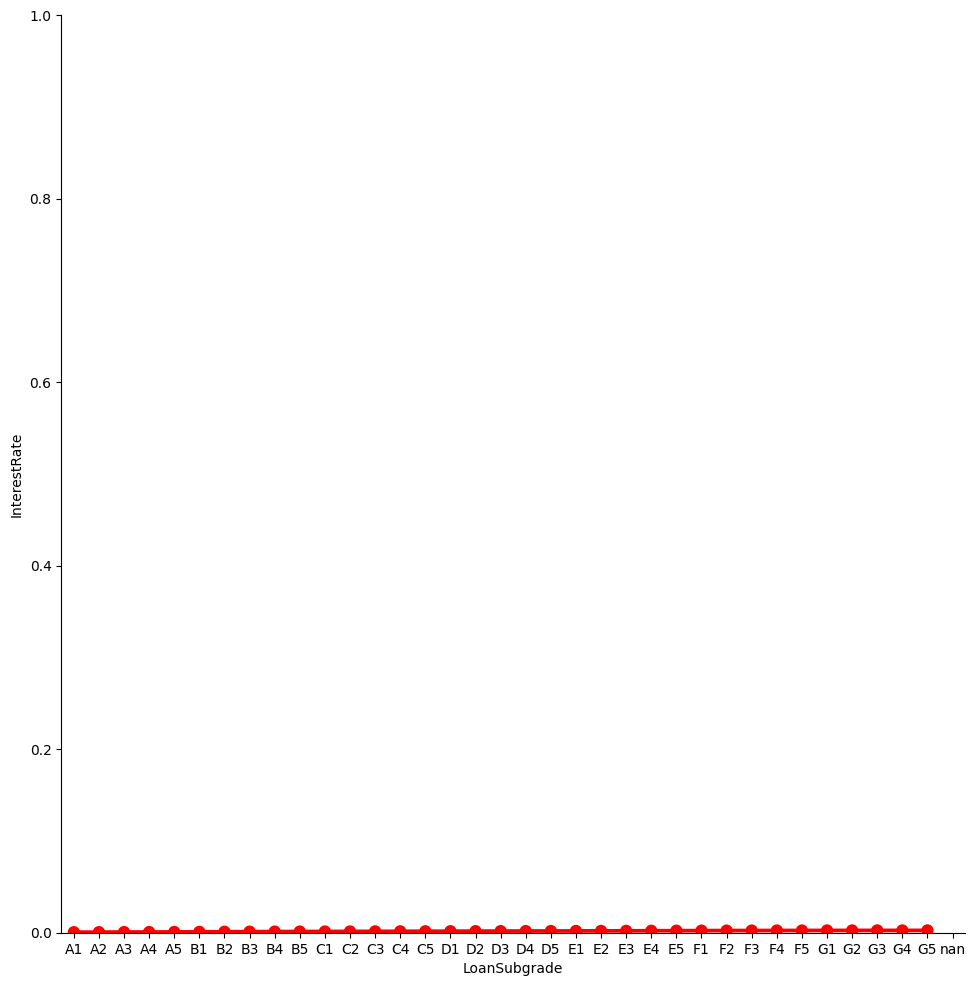

In [143]:
h = sns.PairGrid(data=i, x_vars=['LoanGrade'], y_vars='InterestRate', height=5)
h.map(sns.pointplot, color="red", order=df['LoanGrade'].sort_values().unique())
h.set(ylim=(0, 1))

h = sns.PairGrid(data=i, x_vars=['LoanSubgrade'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red", order=df['LoanSubgrade'].sort_values().unique())
h.set(ylim=(0, 1))

1. Dropping Loan Grade as Loan Sub Grade itself provides a more granular information
2. Droping all null rows under Loan Sub Grade as the column is vital in determining interest rates

In [144]:
df = df.drop(['LoanGrade'], axis = 1)

x = df.shape[0]
df = df.dropna(subset=['LoanSubgrade'])
print("Dropping " + str(x - df.shape[0]) + " row(s) which have no Loan Sub Grade \n")
df.info()

Dropping 51866 row(s) which have no Loan Sub Grade 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 338988
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   InterestRate            287123 non-null  float64
 1   RequestedAmount         287123 non-null  float64
 2   FundedAmount            287123 non-null  float64
 3   InvestorFundedPortion   287123 non-null  float64
 4   LoanSubgrade            287123 non-null  object 
 5   Employer_JobTitle       270050 non-null  object 
 6   n_YearsEmployed         274672 non-null  float64
 7   HomeOwnership           242995 non-null  object 
 8   AnnualIncome            243133 non-null  float64
 9   IncomeCheck             287123 non-null  object 
 10  LoanCategory            287123 non-null  object 
 11  Zipcode_3               287123 non-null  object 
 12  State                   287123 non-null  object 
 13  Ratio                

In order to drop Employer_JobTitle since it doesn't have unique values, assigning a person as employed if they have job title or an annual income or have been employed or have an income verified

In [145]:
def check_null(a):
    try:
        return np.isnan(a)
    except:
        return False

df['is_Employed'] = [0 if ((check_null(employ)) and (np.isnan(years)) and (np.isnan(income)) and (verify == 'not verified')) else 1 for employ, years, income, verify in zip(df['Employer_JobTitle'], df['n_YearsEmployed'], df['AnnualIncome'], df['IncomeCheck'])]
df = df.drop(['Employer_JobTitle'], axis=1)

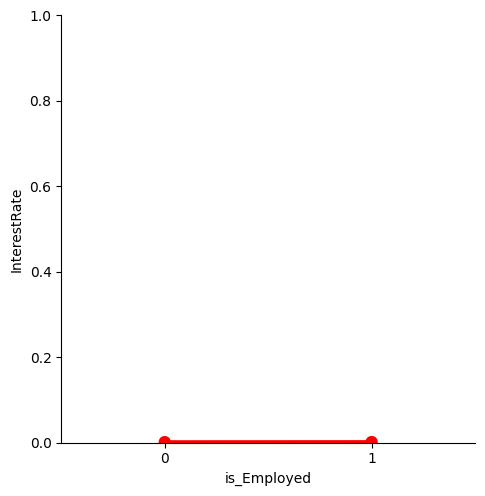

In [146]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100

h = sns.PairGrid(data=i, x_vars=['is_Employed'], y_vars='InterestRate', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

Imputing number of years employed by filling null values with 0

In [147]:
df['n_YearsEmployed'].describe()

count    274672.000000
mean          5.990862
std           3.613771
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: n_YearsEmployed, dtype: float64

In [148]:
df['n_YearsEmployed'] = df['n_YearsEmployed'].fillna(0)
df['n_YearsEmployed'].describe()

count    287123.00000
mean          5.73107
std           3.73924
min           0.00000
25%           2.00000
50%           6.00000
75%          10.00000
max          10.00000
Name: n_YearsEmployed, dtype: float64

The mean hasn't changed much so good to go.

Converting number of Years Employed from 10 category variable to 3 category variable and splitting it into binary

In [149]:
df['YearsEmployed_5'] = df['n_YearsEmployed'].apply(lambda x: 1 if x <= 5 else 0)
df['YearsEmployed_10'] = df['n_YearsEmployed'].apply(lambda x: 1 if (x > 5) & (x < 10) else 0)
df['YearsEmployed_10plus'] = df['n_YearsEmployed'].apply(lambda x: 1 if x == 10 else 0)

df = df.drop(['n_YearsEmployed'], axis=1)

1. For Home Ownership status, tagging 'none' and 'any' under 'other' to make it easier
2. Any null vaues, tagging it under 'other'

In [150]:
print("Unique values in HomeOwnership = " + str(df['HomeOwnership'].unique()))
df['HomeOwnership'] = df['HomeOwnership'].replace(['NONE', 'ANY'], 'OTHER').fillna('OTHER')
print("Unique values in HomeOwnership after imputing = " + str(df['HomeOwnership'].unique()))

Unique values in HomeOwnership = ['RENT' 'OWN' 'MORTGAGE' 'NONE' nan 'OTHER' 'ANY']
Unique values in HomeOwnership after imputing = ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


<AxesSubplot: xlabel='HomeOwnership', ylabel='count'>

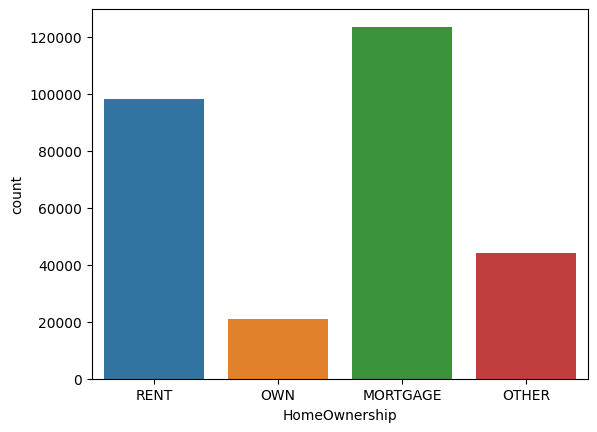

In [151]:
sns.countplot(x='HomeOwnership', data=df)

<AxesSubplot: xlabel='AnnualIncome', ylabel='Density'>

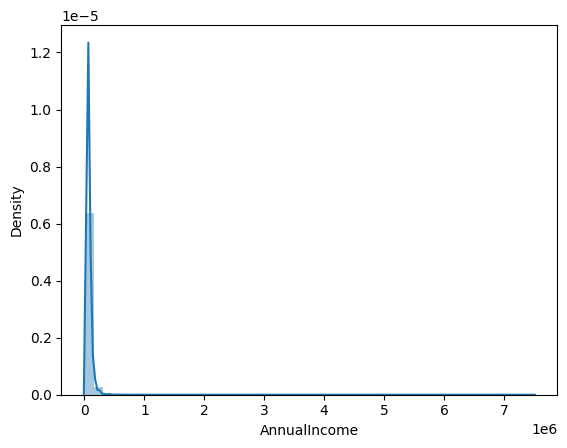

In [152]:
sns.distplot(df[df['AnnualIncome'].notnull()]['AnnualIncome'])

In [153]:
df['AnnualIncome'].describe().apply(lambda x: format(x, 'f'))

count     243133.000000
mean       73132.818005
std        56603.991065
min         3000.000000
25%        45000.000000
50%        62770.000000
75%        88000.000000
max      7500000.000000
Name: AnnualIncome, dtype: object

1. Based on zipcode and state combination, the median annual income for each combination is used to imput null values under Annual income with same combination
2. Dropping columns Zipcode and State

In [154]:
df['is_Employed'].value_counts()

1    287034
0        89
Name: is_Employed, dtype: int64

In [155]:
df['Zip-State'] = df['Zipcode_3'].str.replace('xx', '') + df['State']
df['Zip-State']
# Group the data by 'Zip' and 'State'
grouped = df.groupby(['Zip-State'])
# Compute the median value of 'Income' for each group
median_income = grouped['AnnualIncome'].median().reset_index()
# Use the median value to fill the missing values in 'Income'
df = df.merge(median_income, on=['Zip-State'], how='left')
df['AnnualIncome'] = np.where((df['AnnualIncome_x'].isna()) & (df['is_Employed'] == 1), df['AnnualIncome_y'], (np.where((df['AnnualIncome_x'].isna()) & (df['is_Employed'] == 0), 0, df['AnnualIncome_x'])))
# df['AnnualIncome'] = np.where((df['AnnualIncome_x'].isna()) & (df['is_Employed'] == 0), 0, df['AnnualIncome_x'])
# Drop the temporary columns 'Income_x' and 'Income_y'
df.loc[df['AnnualIncome'].isna(),"AnnualIncome"] = 0
df['Zipcode_3'] = df['Zipcode_3'].str.replace('xx', '').astype(int)
df.drop(columns=['AnnualIncome_x', 'AnnualIncome_y', 'State', 'Zip-State'], inplace=True)
df['AnnualIncome'].describe().apply(lambda x: format(x, 'f'))

count     287123.000000
mean       71612.761581
std        52311.375283
min            0.000000
25%        48000.000000
50%        62020.000000
75%        82000.000000
max      7500000.000000
Name: AnnualIncome, dtype: object

['VERIFIED - income' 'not verified' 'VERIFIED - income source']


<AxesSubplot: xlabel='IncomeCheck', ylabel='count'>

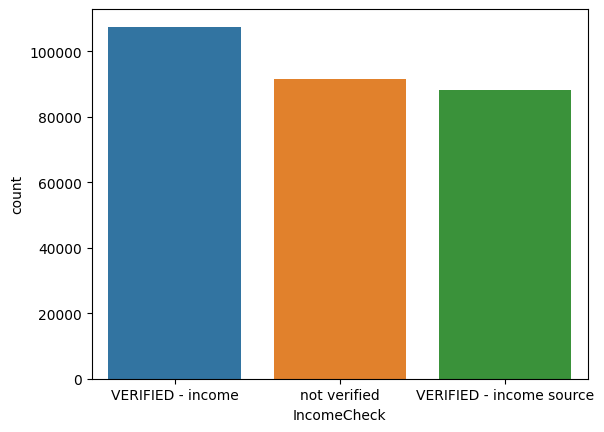

In [156]:
print(df['IncomeCheck'].unique())
sns.countplot(x = 'IncomeCheck', data = df)

As 'VERIFIED - income' and 'VERIFIED - income source' means 'VERIFIED', categorized them as same converted Income check status to a two categorical binary variable

<AxesSubplot: xlabel='IncomeCheck', ylabel='count'>

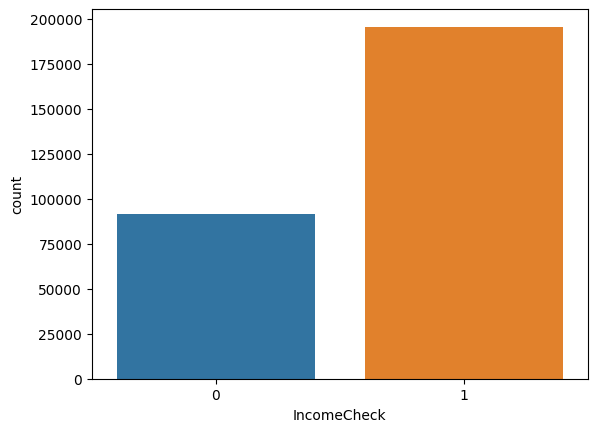

In [157]:
df['IncomeCheck'] = df['IncomeCheck'].apply(lambda x: 1 if x in ['VERIFIED - income', 'VERIFIED - income source'] else 0)
sns.countplot(x = 'IncomeCheck', data = df)

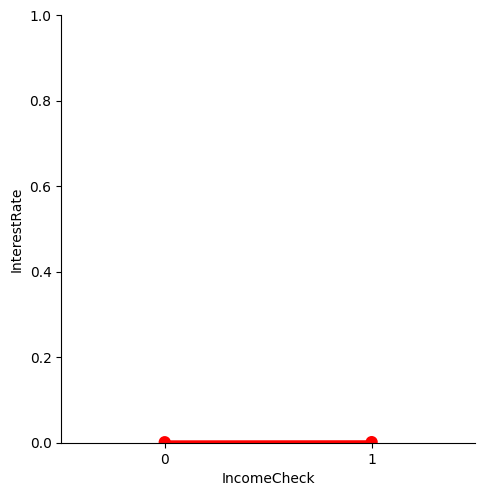

In [158]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100
h = sns.PairGrid(data=i, x_vars=['IncomeCheck'], y_vars='InterestRate', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

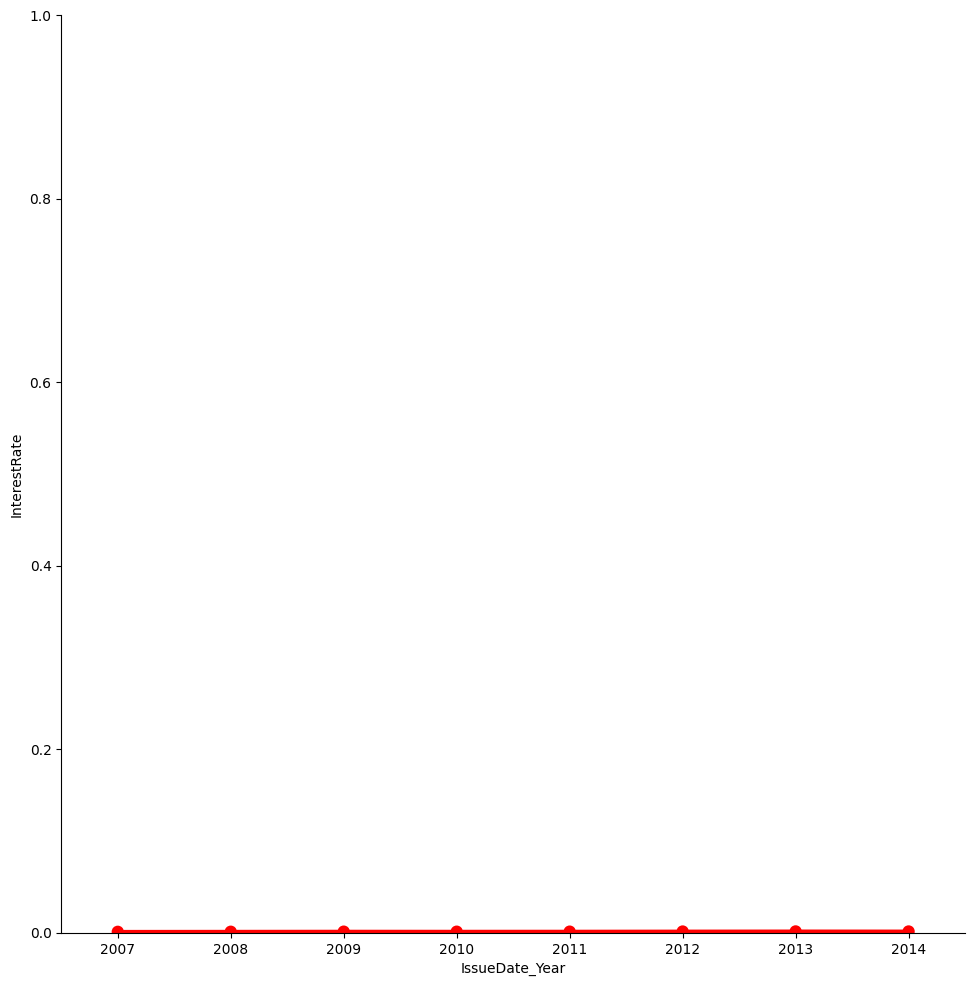

In [159]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100
h = sns.PairGrid(data=i, x_vars=['IssueDate_Year'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

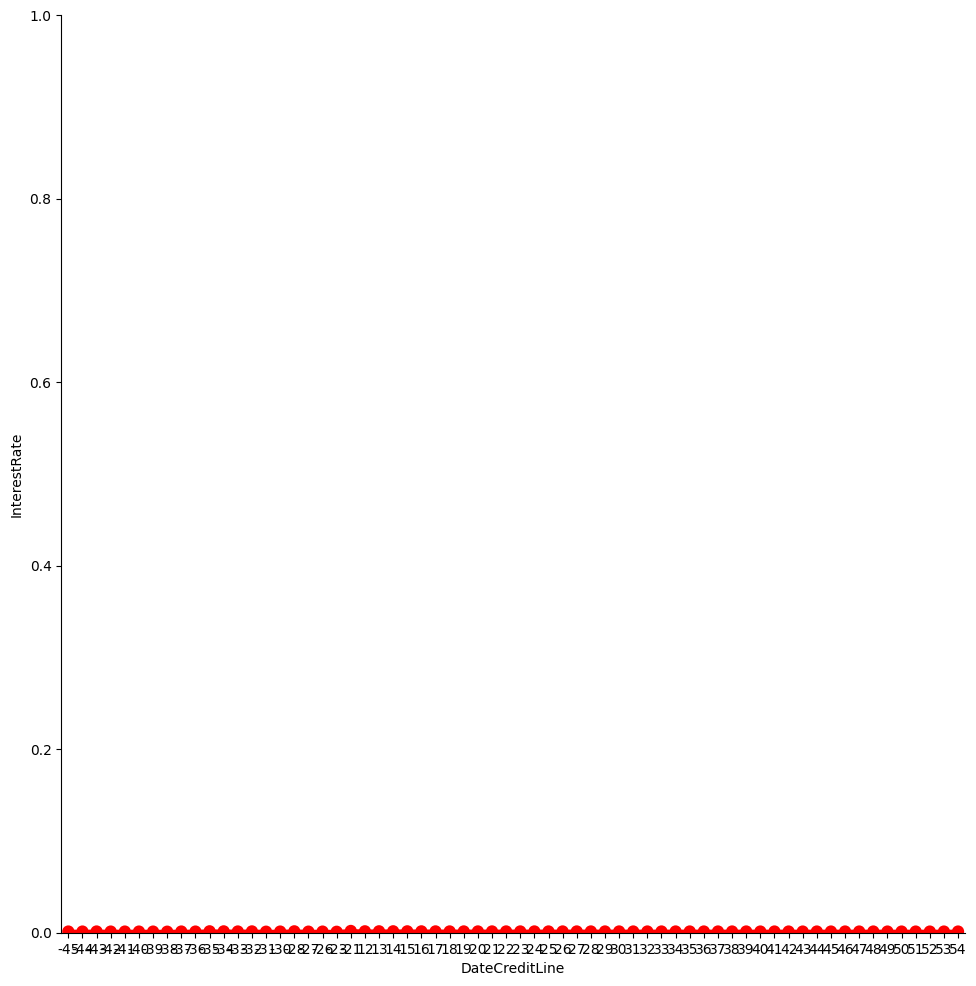

In [160]:
h = sns.PairGrid(data=i, x_vars=['DateCreditLine'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [161]:
df['LoanCategory'].unique()

array(['debt_consolidation', 'credit_card', 'car', 'home_improvement',
       'small_business', 'major_purchase', 'other', 'house', 'vacation',
       'educational', 'moving', 'wedding', 'medical', 'renewable_energy'],
      dtype=object)

Mapping all categories and Loan Title to a 3 category column

In [162]:
loan_category_map = {
    'debt_consolidation': 'Debt Consolidation',
    'credit_card': 'Credit Card',
    'car': 'Debt Consolidation',
    'home_improvement': 'Home Improvement',
    'small_business': 'Major Purchase',
    'major_purchase': 'Major Purchase',
    'other': 'Other',
    'house': 'Home Improvement',
    'vacation': 'Home Improvement',
    'educational': 'Major Purchase',
    'moving': 'Home Improvement',
    'wedding': 'Home Improvement',
    'medical': 'Debt Consolidation',
    'renewable_energy': 'Home Improvement'
}

df = df.assign(LoanCategory=df['LoanCategory'].str.extract(f"({'|'.join(loan_category_map.keys())})", expand=False)
             .map(loan_category_map))
# df['LoanCategory'] = df['LoanCategory'].map(loan_category_map)
df['LoanCategory'].unique()

array(['Debt Consolidation', 'Credit Card', 'Home Improvement',
       'Major Purchase', 'Other'], dtype=object)

Keeping n_Incidences, n_Inquiries, n_OpenCreditLines, n_DerogatoryRecords, n_CreditLines numerical

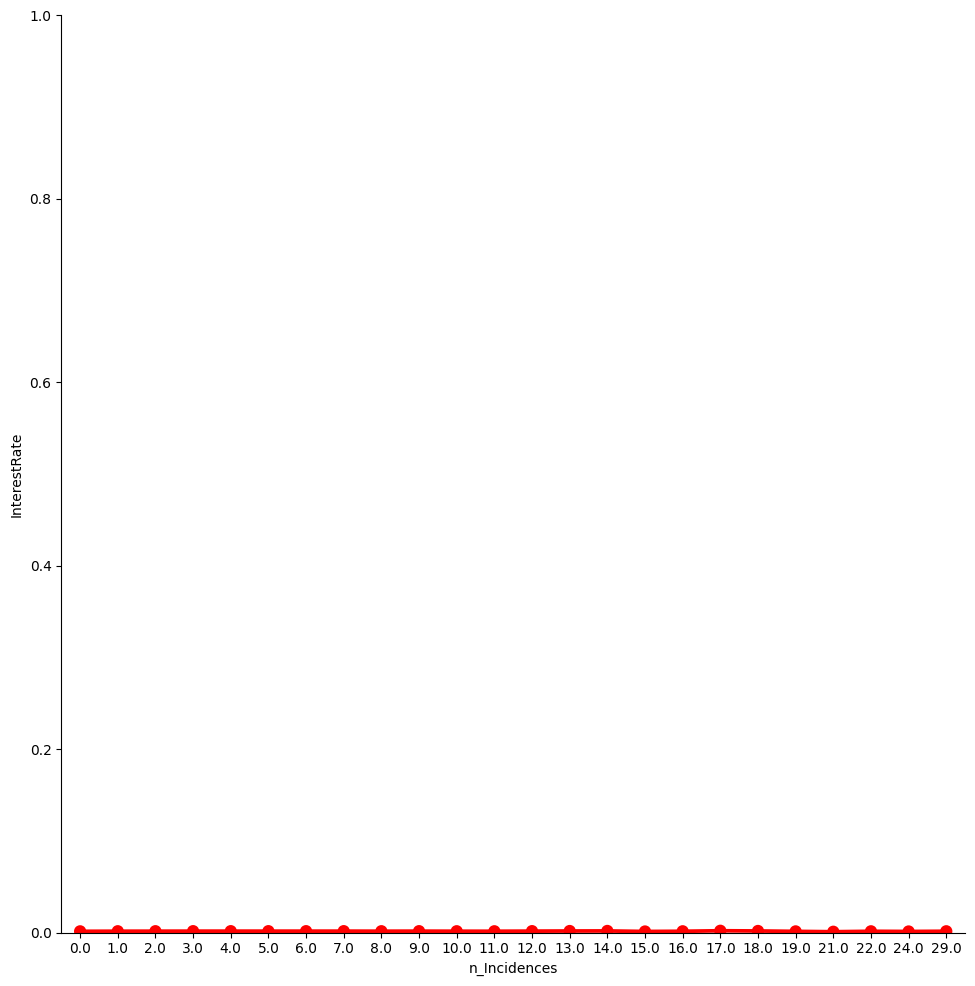

In [163]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100
h = sns.PairGrid(data=i, x_vars=['n_Incidences'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

[0. 1. 2. 3. 4. 5. 6. 8. 7.]


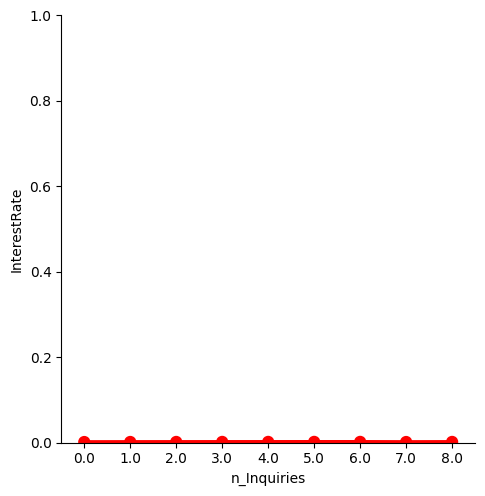

In [164]:
print(df['n_Inquiries'].unique())
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100
h = sns.PairGrid(data=i, x_vars=['n_Inquiries'], y_vars='InterestRate', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

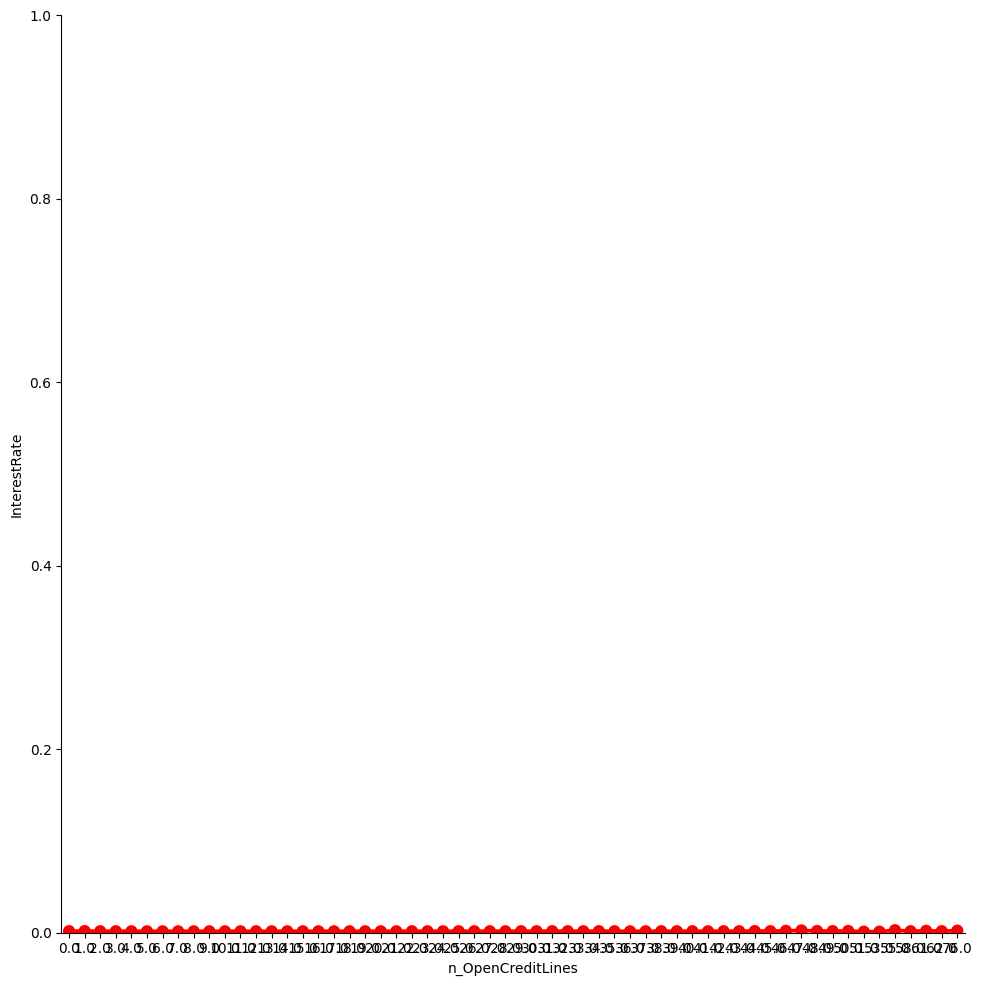

In [165]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100
h = sns.PairGrid(data=i, x_vars=['n_OpenCreditLines'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

[ 0.  1.  2.  3.  4.  5.  6.  8.  7. 54. 10. 11. 49.  9. 17. 13. 34. 21.
 63. 40. 18. 14.]


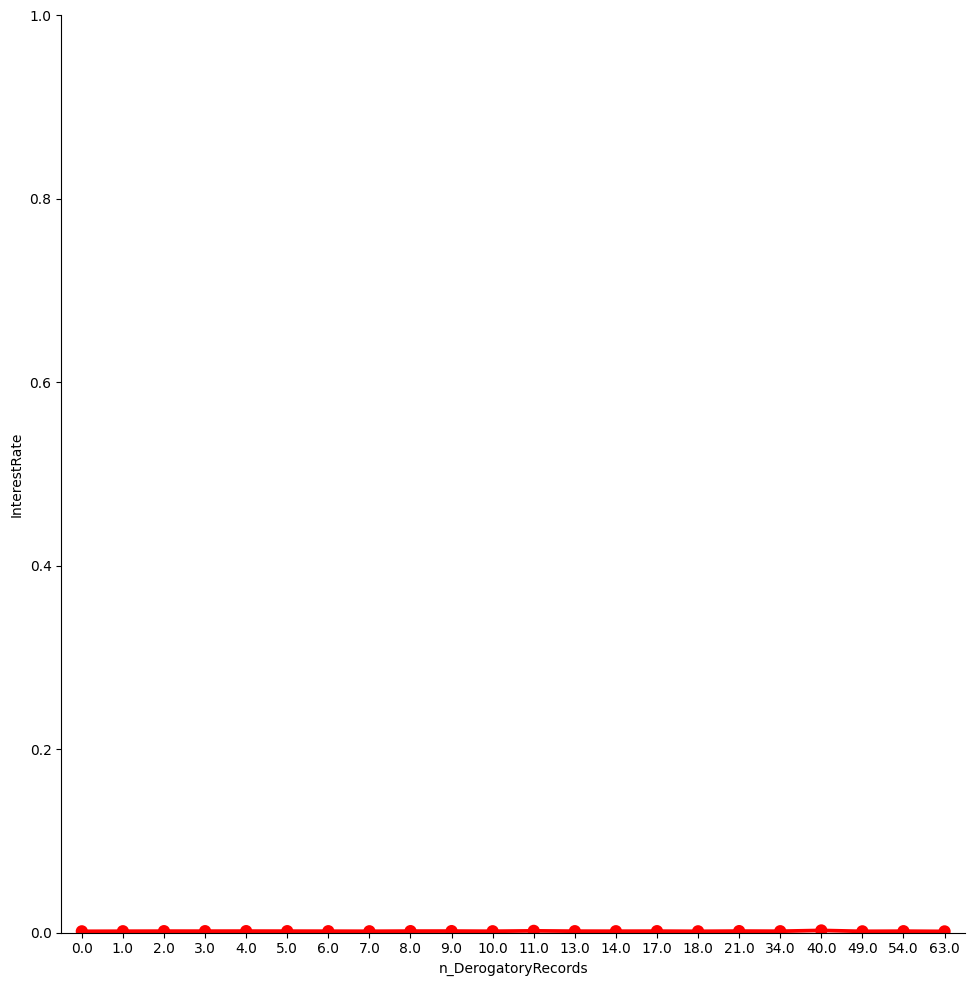

In [166]:
print(df['n_DerogatoryRecords'].unique())

i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100

h = sns.PairGrid(data=i, x_vars=['n_DerogatoryRecords'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

<AxesSubplot: xlabel='UtilizationRate', ylabel='Density'>

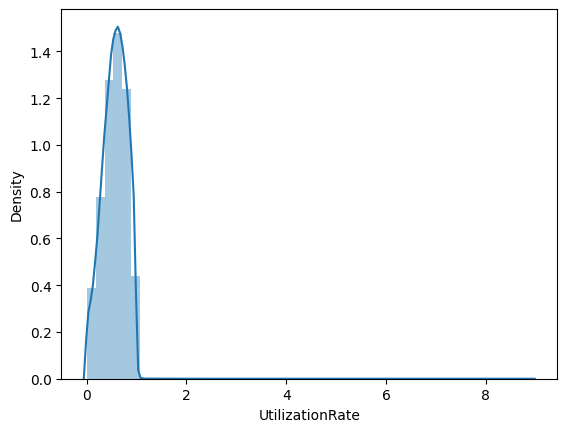

In [167]:
sns.distplot(df[df['UtilizationRate'].notnull()]['UtilizationRate'])

In [168]:
df['UtilizationRate'].describe()

count    286945.000000
mean          0.563176
std           0.237715
min           0.000000
25%           0.395000
50%           0.579000
75%           0.749000
max           8.923000
Name: UtilizationRate, dtype: float64

Dropping null rows based on Utilization Rates as it is only 178 rows

In [169]:
x = df.shape[0]
df = df.dropna(subset=['UtilizationRate'])
print("Dropping " + str(x - df.shape[0]) + " row(s) which have no Utilization Rate \n")

Dropping 178 row(s) which have no Utilization Rate 



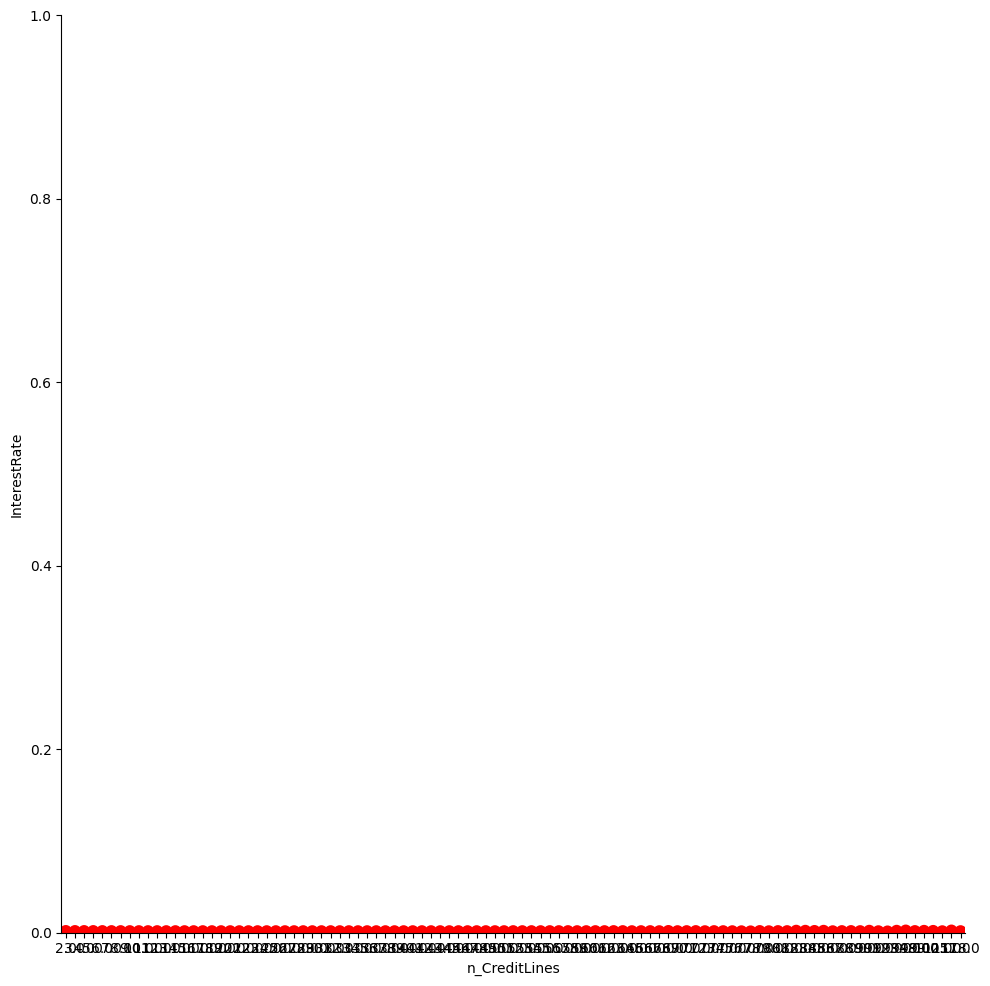

In [170]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100

h = sns.PairGrid(data=i, x_vars=['n_CreditLines'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

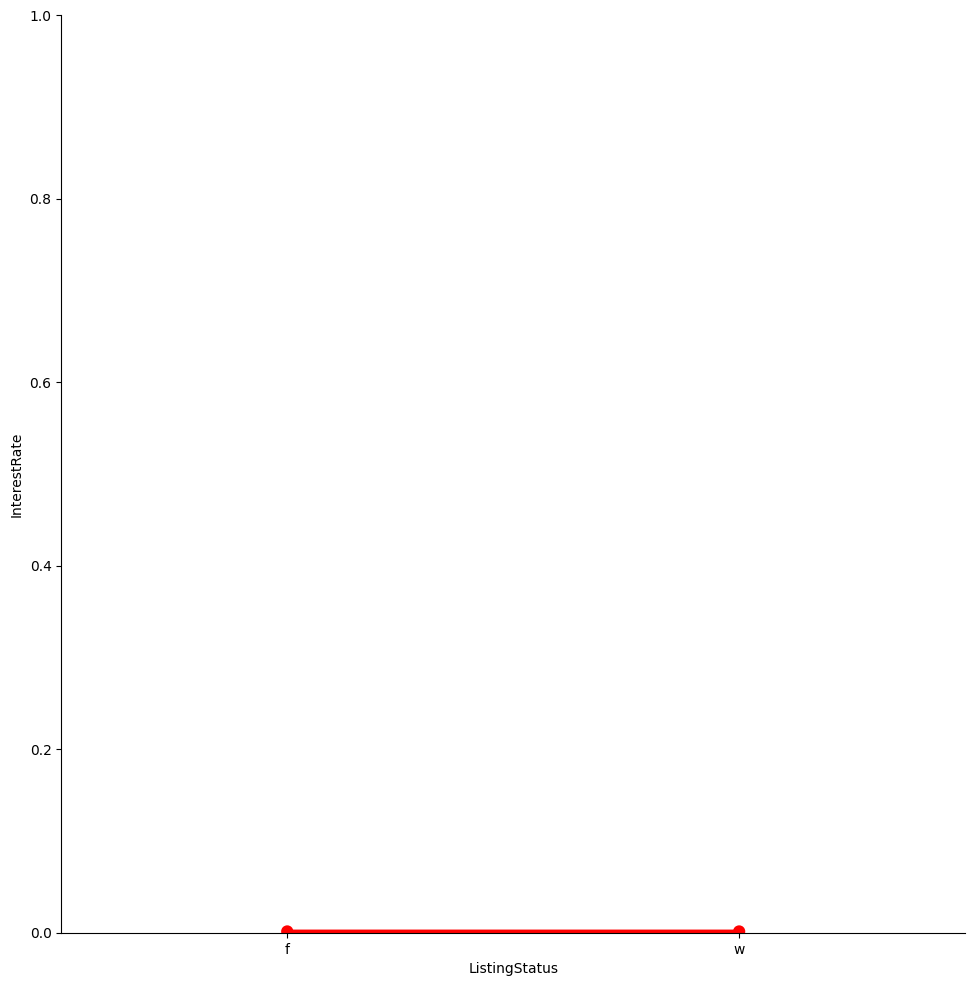

In [171]:
i = df.copy(deep=True)
i['InterestRate'] = i['InterestRate']/100

h = sns.PairGrid(data=i, x_vars=['ListingStatus'], y_vars='InterestRate', height=10)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [172]:
# df = df.drop(['IssueDate_Month', 'IssueDate_Year', 'DateCreditLine'], axis = 1)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286945 entries, 0 to 287122
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   InterestRate            286945 non-null  float64
 1   RequestedAmount         286945 non-null  float64
 2   FundedAmount            286945 non-null  float64
 3   InvestorFundedPortion   286945 non-null  float64
 4   LoanSubgrade            286945 non-null  object 
 5   HomeOwnership           286945 non-null  object 
 6   IncomeCheck             286945 non-null  int64  
 7   LoanCategory            286945 non-null  object 
 8   Zipcode_3               286945 non-null  int32  
 9   Ratio                   286945 non-null  float64
 10  n_Incidences            286945 non-null  float64
 11  DateCreditLine          286945 non-null  int64  
 12  n_Inquiries             286945 non-null  float64
 13  n_OpenCreditLines       286945 non-null  float64
 14  n_DerogatoryRecords 

<b>Convert categorical variables to dummies where necessary

In [174]:
df = pd.get_dummies(df, prefix='is')
df.head().T


,0,1,2,3,4
InterestRate,0.1189,0.1071,0.1699,0.1311,0.1357
RequestedAmount,25000.0000,7000.0000,25000.0000,1200.0000,10800.0000
FundedAmount,25000.0000,7000.0000,25000.0000,1200.0000,10800.0000
InvestorFundedPortion,19080.0000,673.0000,24725.0000,1200.0000,10692.0000
IncomeCheck,1.0000,0.0000,1.0000,0.0000,0.0000
Zipcode_3,941.0000,112.0000,100.0000,777.0000,67.0000
Ratio,19.4800,14.2900,10.5000,5.4700,11.6300
n_Incidences,0.0000,0.0000,0.0000,0.0000,0.0000
DateCreditLine,29.0000,23.0000,23.0000,38.0000,27.0000
n_Inquiries,0.0000,0.0000,0.0000,0.0000,1.0000


In [175]:
df.columns

Index(['InterestRate', 'RequestedAmount', 'FundedAmount',
       'InvestorFundedPortion', 'IncomeCheck', 'Zipcode_3', 'Ratio',
       'n_Incidences', 'DateCreditLine', 'n_Inquiries', 'n_OpenCreditLines',
       'n_DerogatoryRecords', 'CreditRevolvingBalance', 'UtilizationRate',
       'n_CreditLines', 'IssueDate_Month', 'IssueDate_Year', 'is_36', 'is_60',
       'is_Employed', 'YearsEmployed_5', 'YearsEmployed_10',
       'YearsEmployed_10plus', 'AnnualIncome', 'is_A1', 'is_A2', 'is_A3',
       'is_A4', 'is_A5', 'is_B1', 'is_B2', 'is_B3', 'is_B4', 'is_B5', 'is_C1',
       'is_C2', 'is_C3', 'is_C4', 'is_C5', 'is_D1', 'is_D2', 'is_D3', 'is_D4',
       'is_D5', 'is_E1', 'is_E2', 'is_E3', 'is_E4', 'is_E5', 'is_F1', 'is_F2',
       'is_F3', 'is_F4', 'is_F5', 'is_G1', 'is_G2', 'is_G3', 'is_G4', 'is_G5',
       'is_MORTGAGE', 'is_OTHER', 'is_OWN', 'is_RENT', 'is_Credit Card',
       'is_Debt Consolidation', 'is_Home Improvement', 'is_Major Purchase',
       'is_Other', 'is_f', 'is_w'],
      

## Build models

In [176]:
df.isna().sum()

InterestRate              0
RequestedAmount           0
FundedAmount              0
InvestorFundedPortion     0
IncomeCheck               0
Zipcode_3                 0
Ratio                     0
n_Incidences              0
DateCreditLine            0
n_Inquiries               0
n_OpenCreditLines         0
n_DerogatoryRecords       0
CreditRevolvingBalance    0
UtilizationRate           0
n_CreditLines             0
IssueDate_Month           0
IssueDate_Year            0
is_36                     0
is_60                     0
is_Employed               0
YearsEmployed_5           0
YearsEmployed_10          0
YearsEmployed_10plus      0
AnnualIncome              0
is_A1                     0
is_A2                     0
is_A3                     0
is_A4                     0
is_A5                     0
is_B1                     0
is_B2                     0
is_B3                     0
is_B4                     0
is_B5                     0
is_C1                     0
is_C2               

In [177]:
X, y = df.drop(['InterestRate'], axis = 1), df['InterestRate']

In [178]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [179]:
X_scaler

array([[ 1.29912996,  1.30496691,  0.59374527, ..., -0.23098313,
         0.6764848 , -0.6764848 ],
       [-0.88094238, -0.87891911, -1.63407215, ..., -0.23098313,
         0.6764848 , -0.6764848 ],
       [ 1.29912996,  1.30496691,  1.2769652 , ..., -0.23098313,
         0.6764848 , -0.6764848 ],
       ...,
       [ 0.69355431,  0.6983319 ,  0.70509378, ..., -0.23098313,
        -1.47822982,  1.47822982],
       [ 0.50885374,  0.51330822,  0.52052152, ..., -0.23098313,
         0.6764848 , -0.6764848 ],
       [ 0.20909379,  0.2130239 ,  0.22096982, ..., -0.23098313,
         0.6764848 , -0.6764848 ]])

In [180]:
train_X, test_X, train_y, test_y = train_test_split(X_scaler, y, train_size = 0.8, test_size = 0.2)

<b>Running through multiple classification models

In [181]:
models = pd.DataFrame(columns=['Model', 'Accuracy Score', 'RMSE', 'R-Squared'])
models_str_list = ['Linear Regression',  'KNN', 'XGBoost', 'LGBM', 'Decision Tree', 'Random Forest']
#, 'SVM', 'Stochastic Gradient Decent', 'Gradient Boosting' 

In [182]:
models_list = [LinearRegression(n_jobs=6), KNeighborsRegressor(n_jobs=6), XGBRegressor(n_jobs=6), LGBMRegressor(n_jobs=6), DecisionTreeRegressor(),
                RandomForestRegressor(n_jobs=6)] #, SVR, SGDRegressor,
                # GradientBoostingRegressor, ]

classifier_list = []

for x, m in zip(models_list, models_str_list):
    clf = x
    print("Fitting Model: " + str(clf))
    clf.fit(train_X, train_y)
    classifier_list.append(clf)
    y_pred_log_reg = clf.predict(test_X)
    acc_log_reg = round( clf.score(test_X, test_y) * 100, 2)
    rmse = metrics.mean_squared_error(test_y, y_pred_log_reg, squared=False)
    rsquared =  metrics.r2_score(test_y, y_pred_log_reg)
    print ('Accuracy score = ' + str(acc_log_reg) + ' percent')
    print ('RMSE = ' + str(rmse))
    print ('R-Squared = ' + str(rsquared))
    print("\n")
    models = models.append({'Model': m, 'Accuracy Score': acc_log_reg, 'RMSE': rmse, 'R-Squared': rsquared}, ignore_index=True)


Fitting Model: LinearRegression(n_jobs=6)
Accuracy score = 96.77 percent
RMSE = 0.007886612381703125
R-Squared = 0.9676666673033074


Fitting Model: KNeighborsRegressor(n_jobs=6)
Accuracy score = 97.48 percent
RMSE = 0.006957094739417382
R-Squared = 0.9748391497218806


Fitting Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=6, num_parallel_tree=None, predictor=None,
             

In [183]:
models

,Model,Accuracy Score,RMSE,R-Squared
0,Linear Regression,96.77,0.007887,0.967667
1,KNN,97.48,0.006957,0.974839
2,XGBoost,99.61,0.002746,0.996082
3,LGBM,99.57,0.002872,0.995713
4,Decision Tree,99.62,0.002718,0.996160
5,Random Forest,99.77,0.002089,0.997731
